In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

(800, 2)
[[1.08649353 1.29303871]
 [1.29303871 1.59570277]]


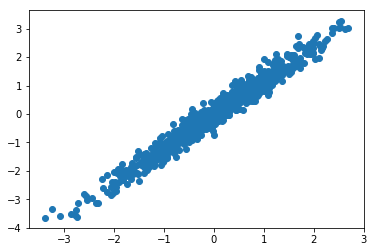

In [5]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], 
                   [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape
print np.cov(data.T)

plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [6]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    #Z = X.dot(W)
    return eig_val, eig_vec

In [7]:
lam, W = pca(data)
#W is (n,n) n-number of eigen values
print lam.shape, W.shape

(2,) (2, 2)


In [8]:
print lam
print W

[0.02323145 2.65896485]
[[-0.77239709 -0.63513994]
 [ 0.63513994 -0.77239709]]


In [9]:
print np.cov(data.T)

[[1.08649353 1.29303871]
 [1.29303871 1.59570277]]


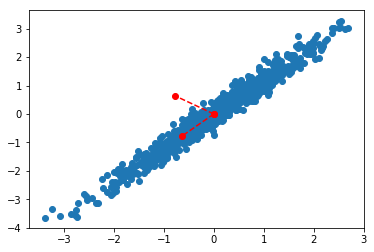

In [10]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, W[0, 0]], [0, W[1, 0]], 'ro--')
plt.plot([0, W[0, 1]], [0, W[1, 1]], 'ro--')
plt.show()

(800, 2)
[[-0.01015641 -0.95958585]
 [-0.0667973   1.7537663 ]
 [-0.04469797  1.15676264]
 [ 0.13527128  1.73570142]
 [-0.17111295 -0.05229056]
 [ 0.06927596 -1.60072539]
 [ 0.20794644  0.96540138]
 [-0.13548602 -0.31397163]
 [ 0.07168794 -2.96133021]
 [-0.06644398 -2.89992276]]


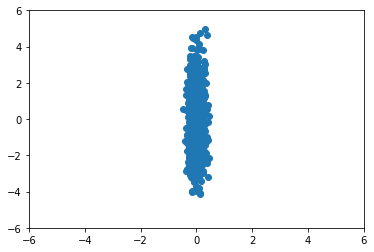

In [11]:
#Z is the transformed matrix
#W is the matrix with eigen values
Z = data.dot(W)
print Z.shape
print Z[:10]

plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

In [12]:
sigma = np.cov(Z.T)
#this gives the covariance
print (sigma)
#orignal covariance matrix reconstructed
print W.dot(sigma).dot(W.T)

[[ 2.32314549e-02 -3.35706987e-16]
 [-3.35706987e-16  2.65896485e+00]]
[[1.08649353 1.29303871]
 [1.29303871 1.59570277]]


(800, 2)


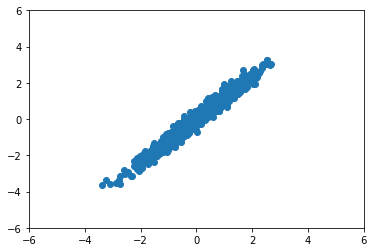

In [13]:
# Reconstructing the original data
#since y=XW
#inorder to retrieve X we do X=YW-1 and W being diag matrix W-=WT
D = Z.dot(W.T)
print D.shape

plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(D[:, 0], D[:, 1])
plt.show()

In [14]:
#gives the cumulative sum
#based on the cum sum we reduce the dimensions
print lam
print np.cumsum(lam)
print lam.sum()
print lam[::-1]
print np.cumsum(lam)/lam.sum()

[0.02323145 2.65896485]
[0.02323145 2.6821963 ]
2.682196303625502
[2.65896485 0.02323145]
[0.00866136 1.        ]


# PCA on MNIST

In [15]:
ds = pd.read_csv('../data/mnist/train.csv')
#the col 1 has the labes rest ahead it has the pixel values
data = ds.values[:10000, 1:]
y = ds.values[:10000, 0]
print data.shape

(10000, 784)


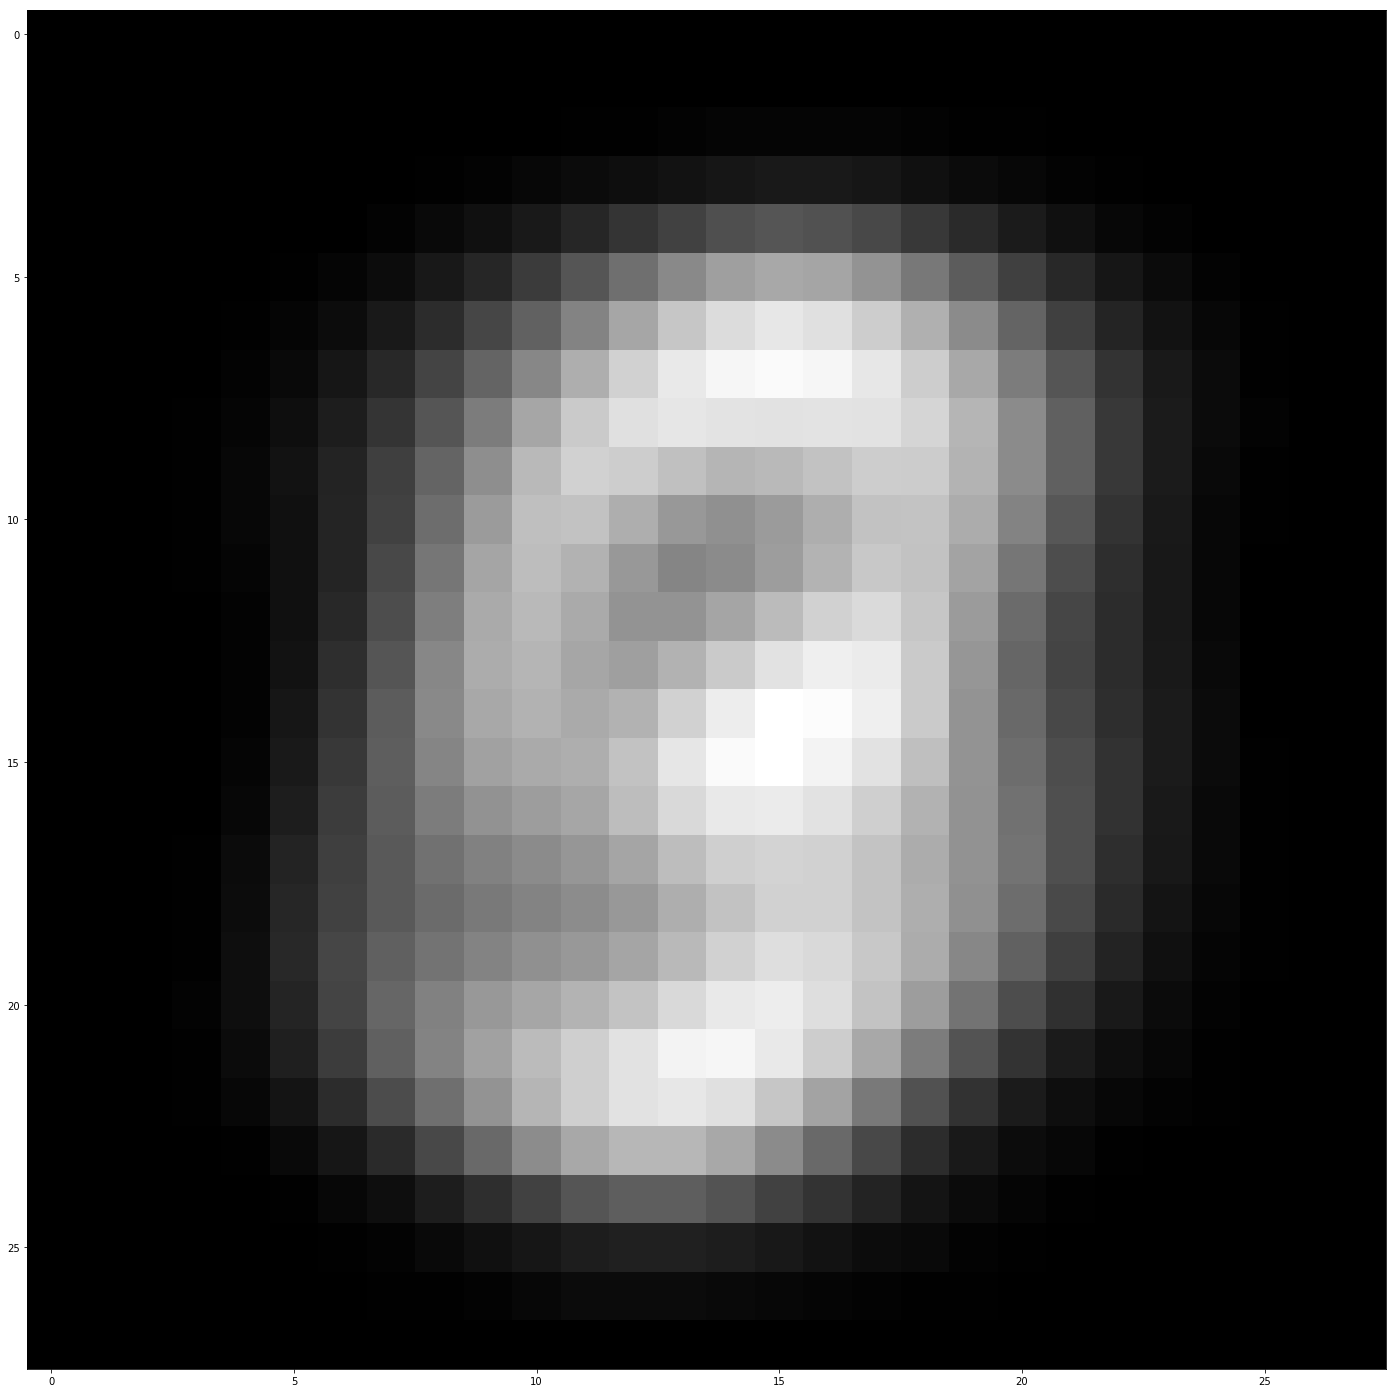

In [27]:
N = 1200
plt.figure(0,figsize=(25,25))
plt.grid("off")
plt.imshow(data[:].mean(axis=0).astype(np.uint8).reshape((28, 28)), cmap='gray')
#plt.imshow(data[:].mean(axis=0).astype(np.uint8).reshape((28, 28)), cmap='gray')

In [31]:
A = np.cov(data.T)
print A.shape

(784, 784)


In [32]:
eig_vals, eig_vecs = np.linalg.eig(A)
print eig_vals.shape

(784,)


In [33]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print len(info)

784


In [34]:
info = sorted(info, key=lambda z: z[0], reverse=True)

In [35]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])

sorted_lambda = np.asarray(sorted_lambda)
sorted_W = np.asarray(sorted_W)

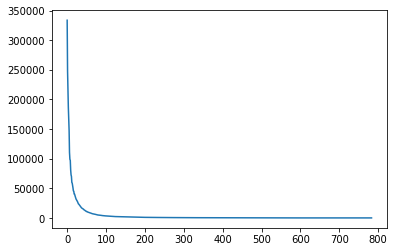

In [37]:
plt.plot(sorted_lambda)

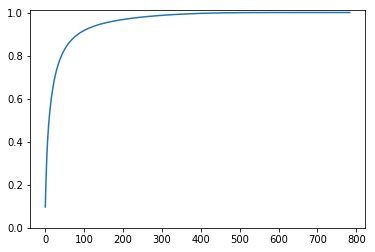

In [38]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [41]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())
#has many complex numbers
print explained_variances_ratio[326] #number of idrections

(0.9900294621564607+0j)


In [41]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] < 0.99:
        pass
    else:
        print ix
        break

326


In [42]:
k = 500
W = sorted_W[:, :k]
Z = data.dot(W)
print Z.shape

(10000, 500)


(10000, 784)


/home/shubhijain/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


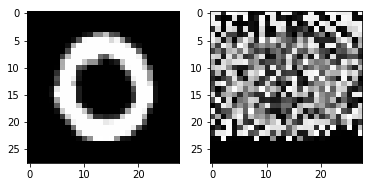

In [43]:
X_reconstruct = Z.dot(W.T).astype(np.uint8)
X_pos = (X_reconstruct>0)
X_new = X_reconstruct * X_pos

print X_reconstruct.shape

# print np.asarray(X_reconstruct[0], dtype='uint8')
N = 1

plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].astype(np.uint8).reshape((28, 28)), cmap='gray')
plt.subplot(1, 2, 2)
plt.grid("off")
plt.imshow(X_new[N].astype(np.uint8).reshape((28, 28)), cmap='gray')

In [ ]:
##PCA via Sklearn.decomposition

In [44]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=500)

X_ = pca.fit_transform(data)
print X_.shape

(10000, 500)


In [52]:
X_re = pca.inverse_transform(X_)
X_re.shape

(10000, 784)

258.0509759938283


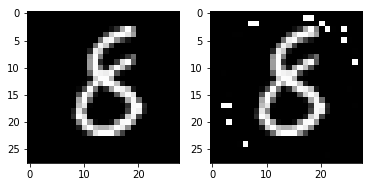

In [54]:
N = np.random.randint(0, high=10000)
plt.subplot(1, 2, 1)
plt.grid("off")
plt.imshow(data[N].reshape((28, 28)), cmap='gray')

plt.subplot(1, 2, 2)
plt.grid("off")

im = X_re[N]
img = im - im.min()
print img.max()
img = img

plt.imshow(im.astype(np.uint8).reshape((28, 28)), cmap='gray')

plt.show()

In [55]:
X_re.shape

(10000, 784)

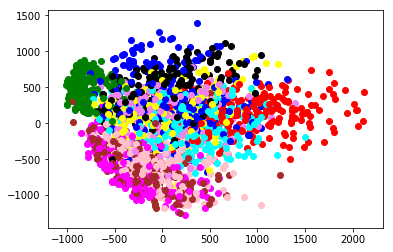

In [56]:
colors = ['red', 'green', 'blue', 'black', 'pink', 'yellow', 'cyan', 'magenta', 'violet', 'brown', 'orange']
plt.figure(0)
for ix in range(2000):
    plt.scatter(X_[ix, 0], X_[ix, 1], color=colors[y[ix]])
plt.show()